In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
!mv m4_survey_data.sqlite ./files

--2021-02-21 23:14:41--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  8.86MB/s    in 4.3s    

2021-02-21 23:14:46 (8.17 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



In [2]:
from glob import glob
import pandas as pd
import sqlite3
import os

In [3]:
path_SQL = r'./files/*.sqlite'
sql = glob(os.path.join(path_SQL))[0]
country_region = pd.read_csv(os.path.join(r'./files','Country_Region.csv'))

In [4]:
conn = sqlite3.connect(sql)

In [5]:
query = '''
    select name as Table_Name from sqlite_master where
    type = 'table';
'''

tables = pd.read_sql_query(query,conn)
tables

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [6]:
EduOther = pd.read_sql_query('Select * from EduOther;',conn)
DevType = pd.read_sql_query('Select * from DevType;',conn)
LastInt = pd.read_sql_query('Select * from LastInt;',conn)
JobFactors = pd.read_sql_query('Select * from JobFactors;',conn)
WorkPlan = pd.read_sql_query('Select * from WorkPlan;',conn)
WorkChallenge = pd.read_sql_query('Select * from WorkChallenge;',conn)
LanguageWorkedWith = pd.read_sql_query('Select * from LanguageWorkedWith;',conn)
LanguageDesireNextYear = pd.read_sql_query('Select * from LanguageDesireNextYear;',conn)
DatabaseWorkedWith = pd.read_sql_query('Select * from DatabaseWorkedWith;',conn)
DatabaseDesireNextYear = pd.read_sql_query('Select * from DatabaseDesireNextYear;',conn)
PlatformWorkedWith = pd.read_sql_query('Select * from PlatformWorkedWith;',conn)
PlatformDesireNextYear = pd.read_sql_query('Select * from PlatformDesireNextYear;',conn)
WebFrameWorkedWith = pd.read_sql_query('Select * from WebFrameWorkedWith;',conn)
WebFrameDesireNextYear = pd.read_sql_query('Select * from WebFrameDesireNextYear;',conn)
MiscTechWorkedWith = pd.read_sql_query('Select * from MiscTechWorkedWith;',conn)
MiscTechDesireNextYear = pd.read_sql_query('Select * from MiscTechDesireNextYear;',conn)
DevEnviron = pd.read_sql_query('Select * from DevEnviron;',conn)
Containers = pd.read_sql_query('Select * from Containers;',conn)
SOVisitTo = pd.read_sql_query('Select * from SOVisitTo;',conn)
SONewContent = pd.read_sql_query('Select * from SONewContent;',conn)
Gender = pd.read_sql_query('Select * from Gender;',conn)
Sexuality = pd.read_sql_query('Select * from Sexuality;',conn)
Ethnicity = pd.read_sql_query('Select * from Ethnicity;',conn)
master = pd.read_sql_query('Select * from master;',conn)

In [7]:
conn.close()

In [8]:
data = master.join(country_region.set_index(['Country']),on=['Country'])
data = data.join(Gender.set_index(['Respondent']),on=['Respondent'])
data.loc[(~data['Gender'].isin(['Man','Woman'])),'Gender'] = 'Not specified'
data.loc[(data['Region'].isna()),'Region'] = 'Other Region (Not Listed Above)'
data.loc[(data['Sub Region'].isna()),'Sub Region'] = 'Sub Region Country (Not Listed Above)'

In [9]:
regionRespondent = data.groupby(['Region'],as_index=False)['Respondent'].count().sort_values(by='Respondent',ascending=False)
regionRespondent = regionRespondent.reset_index(drop=True)
print('Total number of respondents: {:,.0f}'.format(regionRespondent['Respondent'].sum()))

Total number of respondents: 11,451


<ipython-input-10-d05dd14a9067>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels, fontsize=14)


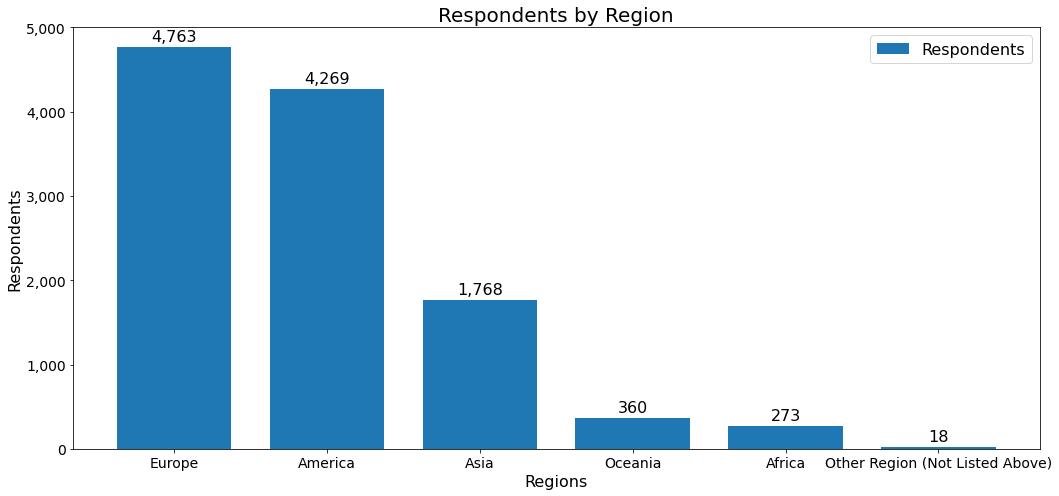

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = regionRespondent['Region'].drop_duplicates().tolist()
countRespondent = regionRespondent['Respondent'].drop_duplicates().tolist()

x = np.arange(len(labels))  # the label locations
width = 0.75  # the width of the bars

fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x, countRespondent, width, label='Respondents')
ylabels=['0','1,000','2,000','3,000','4,000','5,000']
y = np.arange(len(ylabels))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Respondents', fontsize=16)
ax.set_xlabel('Regions', fontsize=16)
ax.set_title('Respondents by Region', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=14)
#ax.set_yticks(ylabels)
ax.set_yticklabels(ylabels, fontsize=14)
ax.legend(fontsize=16)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:,.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=16)


autolabel(rects1)
fig.tight_layout()

plt.show()

In [11]:
genderRespondent = data.groupby(['Gender'],as_index=False)['Respondent'].count()
genderRespondent

,Gender,Respondent
0,Man,10517
1,Not specified,178
2,Woman,756


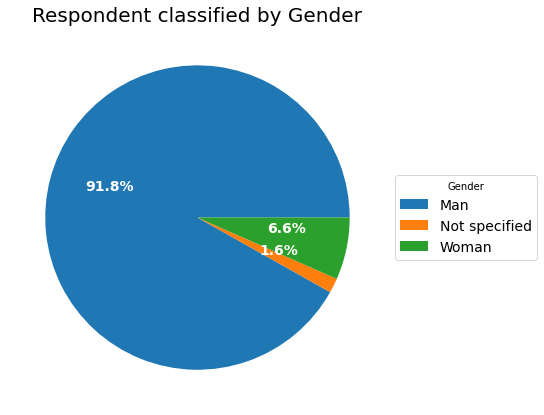

In [12]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 7), subplot_kw=dict(aspect="equal"))

amount = genderRespondent['Respondent'].drop_duplicates().tolist()
labels = genderRespondent['Gender'].drop_duplicates().tolist()


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n".format(pct, absolute)


wedges, texts, autotexts = ax.pie(amount, autopct=lambda pct: func(pct, amount),
                                  textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="Gender",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),fontsize=14)

plt.setp(autotexts, size=14, weight="bold")

ax.set_title("Respondent classified by Gender",fontsize=20)

plt.show()

In [13]:
data.describe()

,index,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,11451.000000,11451.000000,1.064000e+04,1.063300e+04,11329.000000,9018.000000,11161.000000
mean,5699.840538,12493.334381,7.545607e+05,1.312641e+05,42.060023,4.786069,30.775827
std,3290.268843,7235.012753,9.682556e+06,2.941350e+05,24.628072,4.586479,7.394970
min,0.000000,4.000000,0.000000e+00,0.000000e+00,3.000000,0.000000,16.000000
25%,2851.500000,6266.500000,2.500000e+04,2.680800e+04,40.000000,2.000000,25.000000
50%,5699.000000,12485.000000,6.500000e+04,5.774400e+04,40.000000,4.000000,29.000000
75%,8551.500000,18792.500000,1.200000e+05,1.000000e+05,43.000000,5.000000,35.000000
max,11397.000000,25142.000000,7.000000e+08,2.000000e+06,1012.000000,99.000000,99.000000


In [14]:
data.columns

Index(['index', 'Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer',
       'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'OrgSize', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'FizzBuzz', 'ResumeUpdate', 'CurrencySymbol',
       'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'OpSys', 'BlockchainOrg', 'BlockchainIs',
       'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion',
       'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOFindAnswer',
       'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs',
       'EntTeams', 'SOComm', 'WelcomeChange', 'Age', 'Trans', 'Dependents',
       'SurveyLength', 'SurveyEase', 'Sub Region', 'Region', 'Gender'],
      dtype='object')

In [20]:
data.describe()

,index,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,11451.000000,11451.000000,1.064000e+04,1.063300e+04,11329.000000,9018.000000,11161.000000
mean,5699.840538,12493.334381,7.545607e+05,1.312641e+05,42.060023,4.786069,30.775827
std,3290.268843,7235.012753,9.682556e+06,2.941350e+05,24.628072,4.586479,7.394970
min,0.000000,4.000000,0.000000e+00,0.000000e+00,3.000000,0.000000,16.000000
25%,2851.500000,6266.500000,2.500000e+04,2.680800e+04,40.000000,2.000000,25.000000
50%,5699.000000,12485.000000,6.500000e+04,5.774400e+04,40.000000,4.000000,29.000000
75%,8551.500000,18792.500000,1.200000e+05,1.000000e+05,43.000000,5.000000,35.000000
max,11397.000000,25142.000000,7.000000e+08,2.000000e+06,1012.000000,99.000000,99.000000


In [21]:
data2 = pd.read_csv(os.path.join(r'./files','m5_survey_data_technologies_normalised.csv'))

In [41]:
data2 = data2[~data2['Respondent'].isna()]
data2['Respondent'] = data2['Respondent'].astype(int)
topProg = data2.groupby(['LanguageWorkedWith'],as_index=False)['Respondent'].count().sort_values(by=['Respondent'],ascending=False).head()

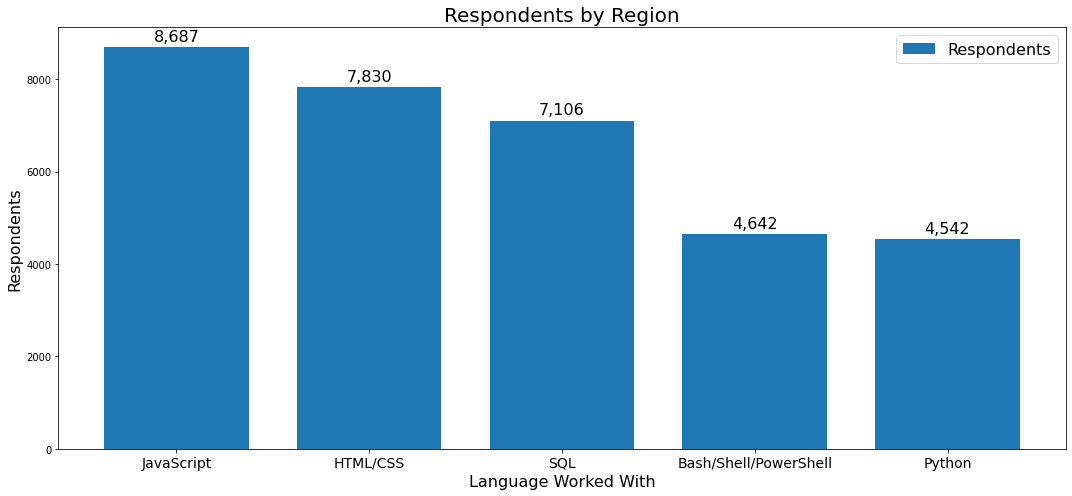

In [42]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = topProg['LanguageWorkedWith'].drop_duplicates().tolist()
countRespondent = topProg['Respondent'].drop_duplicates().tolist()

x = np.arange(len(labels))  # the label locations
width = 0.75  # the width of the bars

fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x, countRespondent, width, label='Respondents')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Respondents', fontsize=16)
ax.set_xlabel('Language Worked With', fontsize=16)
ax.set_title('Respondents by Region', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=14)
ax.legend(fontsize=16)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:,.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=16)


autolabel(rects1)
fig.tight_layout()

plt.show()

In [43]:
master.columns

Index(['index', 'Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer',
       'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'OrgSize', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'FizzBuzz', 'ResumeUpdate', 'CurrencySymbol',
       'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'OpSys', 'BlockchainOrg', 'BlockchainIs',
       'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion',
       'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOFindAnswer',
       'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs',
       'EntTeams', 'SOComm', 'WelcomeChange', 'Age', 'Trans', 'Dependents',
       'SurveyLength', 'SurveyEase'],
      dtype='object')

In [44]:
master.describe()

,index,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,11398.000000,11398.000000,1.058900e+04,1.058200e+04,11276.000000,8972.000000,11111.000000
mean,5698.500000,12490.392437,7.570477e+05,1.315967e+05,42.064606,4.781071,30.779318
std,3290.463519,7235.461999,9.705598e+06,2.947865e+05,24.672741,4.567060,7.393680
min,0.000000,4.000000,0.000000e+00,0.000000e+00,3.000000,0.000000,16.000000
25%,2849.250000,6264.250000,2.500000e+04,2.686800e+04,40.000000,2.000000,25.000000
50%,5698.500000,12484.000000,6.500000e+04,5.774500e+04,40.000000,4.000000,29.000000
75%,8547.750000,18784.750000,1.200000e+05,1.000000e+05,43.000000,5.000000,35.000000
max,11397.000000,25142.000000,7.000000e+08,2.000000e+06,1012.000000,99.000000,99.000000


In [46]:
master.columns

Index(['index', 'Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer',
       'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'OrgSize', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'FizzBuzz', 'ResumeUpdate', 'CurrencySymbol',
       'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'OpSys', 'BlockchainOrg', 'BlockchainIs',
       'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion',
       'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOFindAnswer',
       'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs',
       'EntTeams', 'SOComm', 'WelcomeChange', 'Age', 'Trans', 'Dependents',
       'SurveyLength', 'SurveyEase'],
      dtype='object')

In [47]:
master['ConvertedComp']

0         61000.0
1         95179.0
2         90000.0
3        455352.0
4         65277.0
           ...   
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
11397         NaN
Name: ConvertedComp, Length: 11398, dtype: float64

In [48]:
data.columns

Index(['index', 'Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer',
       'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'OrgSize', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'FizzBuzz', 'ResumeUpdate', 'CurrencySymbol',
       'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'OpSys', 'BlockchainOrg', 'BlockchainIs',
       'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion',
       'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOFindAnswer',
       'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs',
       'EntTeams', 'SOComm', 'WelcomeChange', 'Age', 'Trans', 'Dependents',
       'SurveyLength', 'SurveyEase', 'Sub Region', 'Region', 'Gender'],
      dtype='object')

In [51]:
data.loc[(data['Age']<23)].groupby(['Age'],as_index=False)['Respondent'].count().sum()

Age           133.0
Respondent    839.0
dtype: float64

In [55]:
data.loc[(data['Age']>=23) & (data['Age']<40)].groupby(['Age'],as_index=False)['Respondent'].count().sum()

Age            527.0
Respondent    9007.0
dtype: float64

In [56]:
data.loc[(data['Age']>=40) & (data['Age']<65)].groupby(['Age'],as_index=False)['Respondent'].count().sum()

Age           1236.0
Respondent    1306.0
dtype: float64

In [57]:
data.loc[(data['Age']>=65)].groupby(['Age'],as_index=False)['Respondent'].count().sum()

Age           509.0
Respondent      9.0
dtype: float64